### Decision Tree

This notebook examines the performance of Decision Tree with simple parameter tuning on max_depth, with and without oversampling on training data, and feature importance ranking.

Deicision Tree achieves similar performance as Logistic Regression.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# we define a new function to give us evaluation metrics and visualizations (with codes in Logistic_Regression.ipynb)
def plot_confusion(model, X_test, y_test):
  # predicted values on the testing data
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

  # The confusion matrix
  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

  # Convert confusion matrix into dataframe
  matrix_df = pd.DataFrame(confusion_matrix)


  plt.figure(figsize=(6,6))
  ax = plt.axes()
  sns.set(font_scale=1.3)

  sns.heatmap(matrix_df,
              annot = True, 
              fmt = "g",
              ax = ax, 
              cmap = "magma", 
              cbar = False)

  ax.set_title("Confusion Matrix")
  ax.set_xlabel("Predicted Label", fontsize=15)
  ax.set_xticklabels(["No Heart Disease", "Heart Disease"])
  ax.set_ylabel("True Label", fontsize=15)
  ax.set_yticklabels(["No Heart Disease", "Heart Disease"], rotation=0)
  plt.show()

#### If I use SMOTE

##### Try decision trees with different max_depth parameter

In [ ]:
os_data_X = pd.read_csv('/content/SMOTE_training_x.csv')
os_data_y =  pd.read_csv('/content/SMOTE_training_y.csv')
X_test = pd.read_csv('/content/x_test.csv')
y_test = pd.read_csv('/content/y_test.csv')

*****************************
Max depth parameter is:  5
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     87730
           1       0.18      0.72      0.28      8209

    accuracy                           0.69     95939
   macro avg       0.57      0.70      0.54     95939
weighted avg       0.90      0.69      0.75     95939



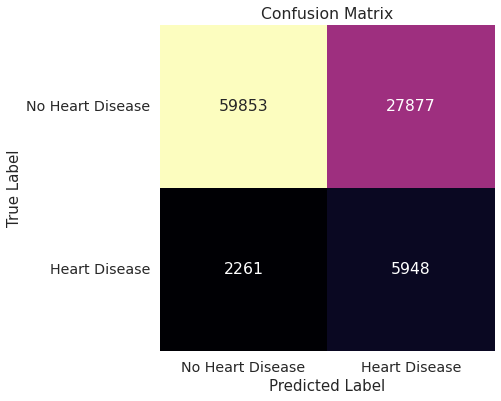

ROC-AUC is:  0.7034057799266921
*****************************
Max depth parameter is:  7
              precision    recall  f1-score   support

           0       0.96      0.71      0.82     87730
           1       0.19      0.71      0.30      8209

    accuracy                           0.71     95939
   macro avg       0.58      0.71      0.56     95939
weighted avg       0.90      0.71      0.77     95939



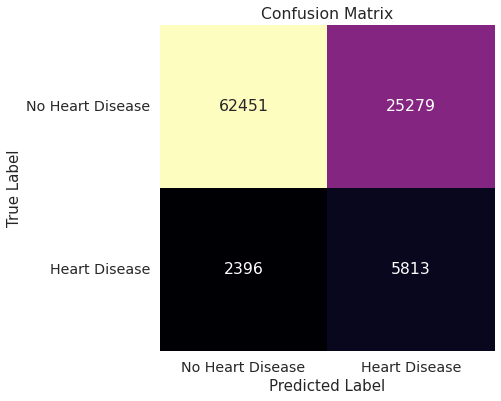

ROC-AUC is:  0.7099898910761441
*****************************
Max depth parameter is:  10
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     87730
           1       0.19      0.69      0.30      8209

    accuracy                           0.72     95939
   macro avg       0.58      0.71      0.56     95939
weighted avg       0.90      0.72      0.78     95939



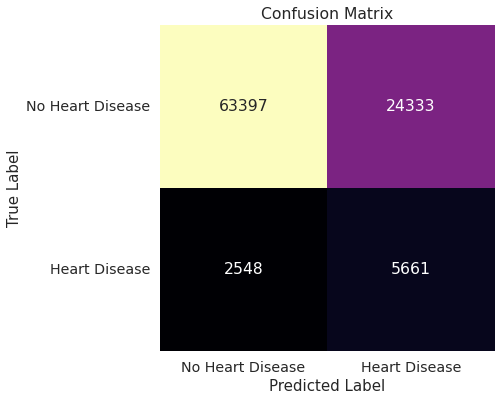

ROC-AUC is:  0.7061233019887081
*****************************
Max depth parameter is:  13
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     87730
           1       0.19      0.63      0.29      8209

    accuracy                           0.74     95939
   macro avg       0.57      0.69      0.57     95939
weighted avg       0.89      0.74      0.79     95939



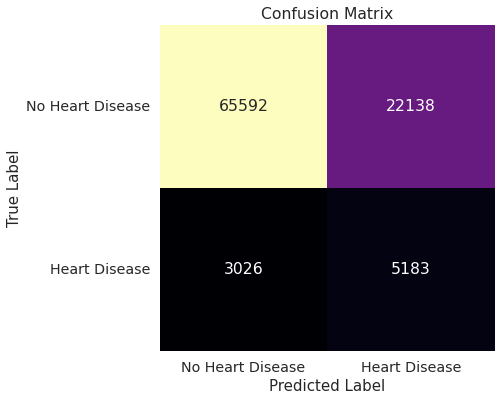

ROC-AUC is:  0.6895188891231064
*****************************
Max depth parameter is:  16
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     87730
           1       0.19      0.58      0.28      8209

    accuracy                           0.75     95939
   macro avg       0.57      0.67      0.56     95939
weighted avg       0.89      0.75      0.80     95939



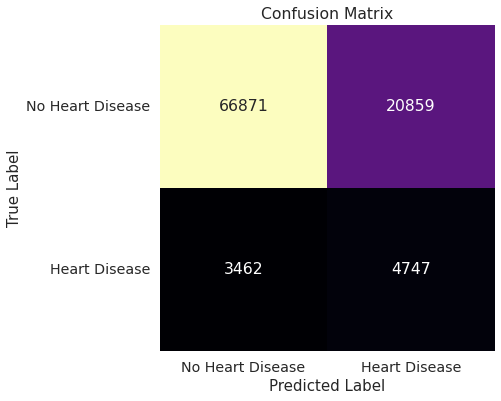

ROC-AUC is:  0.6702520810307409


In [ ]:
max_depths = [5, 7, 10, 13, 16]
for max_depth in max_depths:
  print('*****************************')
  print('Max depth parameter is: ', max_depth)
  decision_tree_os = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  decision_tree_os.fit(os_data_X, os_data_y)
  # print precision, recall, plot confusion matrix
  plot_confusion(decision_tree_os, X_test, y_test)
  # print roc-auc
  roc_auc = roc_auc_score(y_test, decision_tree_os.predict(X_test))
  print('ROC-AUC is: ', roc_auc)

Let's set max_depth = 10. From the above outputs we can see that the model performances with max_depth = 5, 7, 10 do not differ a lot

Let's check the feature importance - This helps us better understand which features are most important when the model is making a prediction for an unseen sample.

Text(0, 0.5, 'Feature')

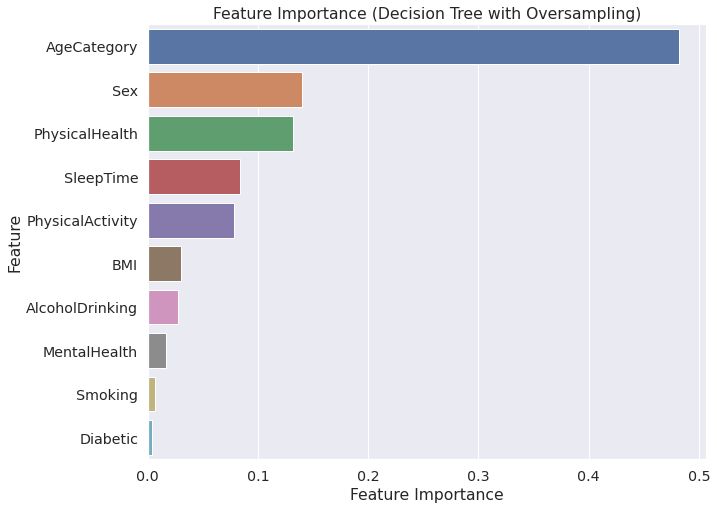

In [ ]:
# set max_depth  = 10
decision_tree_os = DecisionTreeClassifier(max_depth=10, random_state=42)
decision_tree_os.fit(os_data_X, os_data_y)

# compute feature importance scores
imp_df = pd.DataFrame({'feature': os_data_X.columns, 'importance':list(decision_tree_os.feature_importances_)})
imp_df.sort_values('importance', ascending = False, inplace = True)

# visualize feature importance
plt.figure(figsize=(10,8))
sns.barplot(y='feature',x='importance', data = imp_df)
plt.title('Feature Importance (Decision Tree with Oversampling)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

We can see that AgeCategory is the most important feature, with gender, self-reported physical health, sleep time and self-reported exercise amount followed. Notice that no causal interpretation can be made from the analysis without examining possible backdoor paths and confounders - the model is just learning from the data about the associations among the variables!

Compared to the evaluation metrics of the Logistic Regression model, we can see that decision tree achieves similar (slightly inferior) precision, recall and ROC-AUC values. It should be comparable performances if I do more parameter tuning on some other parameters of decision trees.

##### Visualize the tree

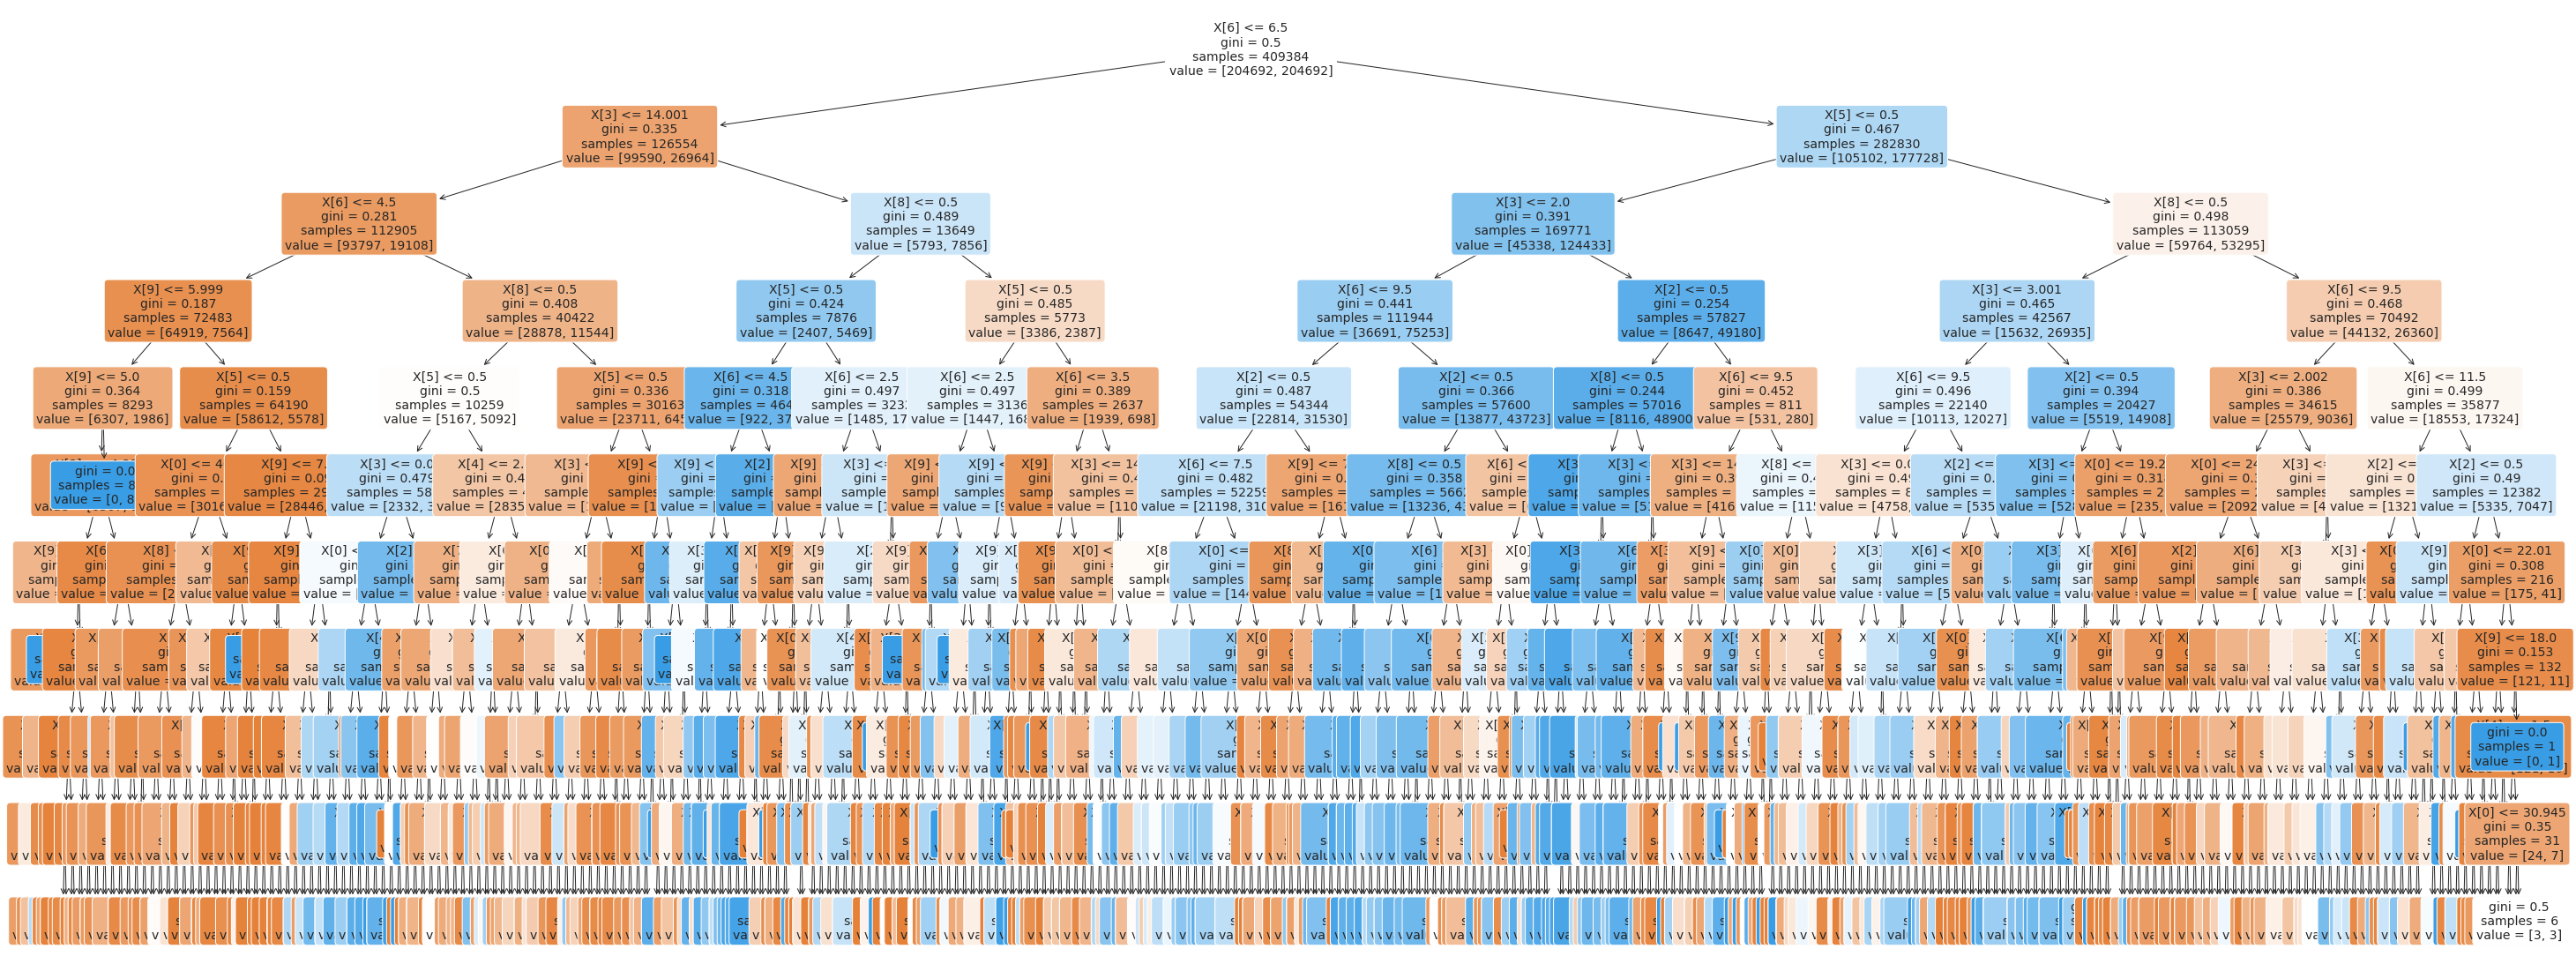

In [ ]:
from sklearn import tree

plt.figure(figsize=(50,20))
a = tree.plot_tree(decision_tree_os,
                   feature_names = None,
                   class_names = None,
                   rounded = True,
                   filled = True,
                   fontsize = 14)

plt.show()

# the tree is too wide to be completely seen in notebook. Downloading it as a figure might help

#### If I do not use SMOTE

Since decision tree is a slightly more complex model than logistic regression, it is interesting to see if it could deal with imbalanced datasets better.

Since we set random_state when doing train test split, the data is comparable to SMOTE oversampling data we saved from Logistic_Regression.ipynb, which is directly read from csv files in the next section.

In [ ]:
def cate_encoding(df, binary_vars):

  # change special values in some columns
  df['Diabetic'] =  df['Diabetic'].replace({'No, borderline diabetes':0,'Yes (during pregnancy)':1,'No':0,'Yes':1})
  df['Sex'] = df['Sex'].map({'Male':0,'Female':1})
  
  # encode binary variables
  for var in binary_vars:
    df[var] = df[var].map({'No':0,'Yes':1})

  # encode categorical variables having more than 2 levels

  # age is an ordinal variable, using one hot encoding results in too many variables
  age_values = sorted(df['AgeCategory'].unique())
  age_dict = {key: value for key, value in zip(age_values, list(range(13)))}  
  df['AgeCategory'] = df['AgeCategory'].map(age_dict)

  # dropping the original categorical features
  df.drop(columns = ['Race', 'GenHealth'], axis = 1, inplace = True)

  return df

In [ ]:
from google.colab import drive
import os 
drive.mount('/gdrive/')

Mounted at /gdrive/


In [ ]:
df = pd.read_csv('/gdrive/MyDrive/INDE577/heart.csv')
df = df[['HeartDisease','BMI','Smoking','AlcoholDrinking','PhysicalHealth','MentalHealth','Sex','AgeCategory','Diabetic','PhysicalActivity','SleepTime','Race', 'GenHealth']]
binary_vars = ['HeartDisease','Smoking','AlcoholDrinking','PhysicalActivity']
df = cate_encoding(df, binary_vars)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,PhysicalActivity,SleepTime
0,0,16.60,1,0,3.0,30.0,1,7,1,1,5.0
1,0,20.34,0,0,0.0,0.0,1,12,0,1,7.0
2,0,26.58,1,0,20.0,30.0,0,9,1,1,8.0
3,0,24.21,0,0,0.0,0.0,1,11,0,0,6.0
4,0,23.71,0,0,28.0,0.0,1,4,0,1,8.0


In [ ]:
# HeartDisease: No: 292422; Yes:27373
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87730
           1       0.36      0.03      0.06      8209

    accuracy                           0.91     95939
   macro avg       0.64      0.51      0.50     95939
weighted avg       0.87      0.91      0.88     95939



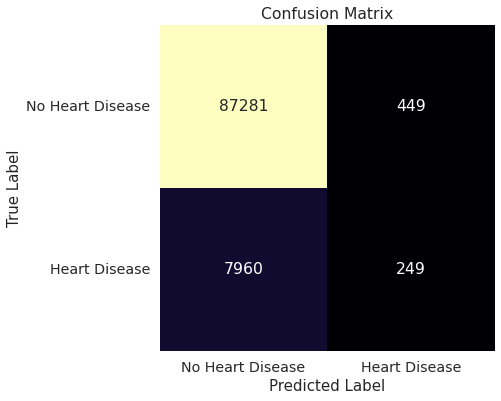

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
decision_tree.fit(X_train, y_train)
plot_confusion(decision_tree, X_test, y_test)

Text(0, 0.5, 'Feature')

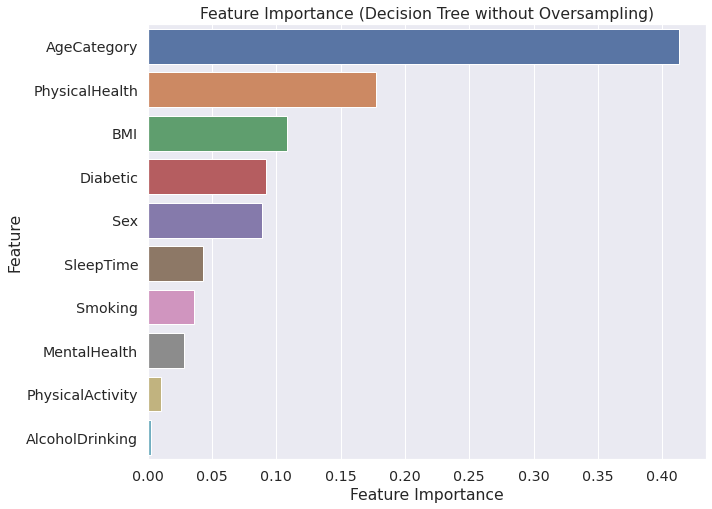

In [ ]:
# calculate feature importance
imp_df = pd.DataFrame({'feature': X_train.columns, 'importance':list(decision_tree.feature_importances_)})
imp_df.sort_values('importance', ascending = False, inplace = True)
# visualize
plt.figure(figsize=(10,8))
sns.barplot(y='feature',x='importance', data = imp_df)
plt.title('Feature Importance (Decision Tree without Oversampling)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

If we do not use SMOTE, we find that the false positive rate decreases, but we also have a very low recall for people having Heart Disease. This indicates that the model is not good at predicting rare positive cases.

This is usually a tradeoff that we need to make: Do we care more about a high false positive rate (Many false alarms) or a high false negative rate (Miss detections)? 

Under the scenario of our data, we may prefer having a low false negative rate - It is likely that these factors we found in people's responses to the surveys are used to help us encourage people having a high probablity of having heart diseases to take precautionary measures, regular health tests, and prevent sudden, unpreparde heart attack. Having people predicted to have a high probability of heart diseases do these pre-tests won't do any harm, but failing to warn people really having heart diseases could lead to severe consequences.

We can also see the feature importance rank changes a bit - but age category is still the variable having the most explanatory power in our data.

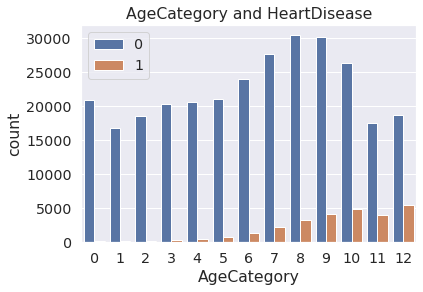

In [ ]:
sns.countplot(x='AgeCategory', hue="HeartDisease", data=df)
plt.title('AgeCategory and HeartDisease')
plt.legend()
plt.show()

Based on this visualization we can see that there is an upward trend in heart disease rate with increasing ages in our data.